# Exemples de segmentation

In [1]:
from skimage.io import imread, imsave
from skimage.color import rgb2gray
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage import img_as_ubyte
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

## Thresholding

[NASA/JPL-Caltech](https://www.jpl.nasa.gov/spaceimages/details.php?id=PIA17369)

Bacterial cells of the recently discovered species Tersicoccus phoenicis, found in only two places: clean rooms in Florida and South America where spacecraft are assembled for launch. The monitoring provides an indication of what species might get into space aboard a spacecraft.

uint8, [0, 255]


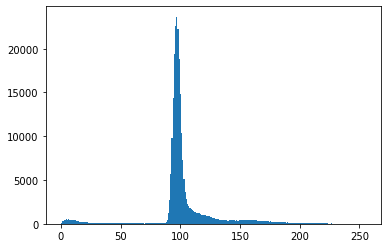

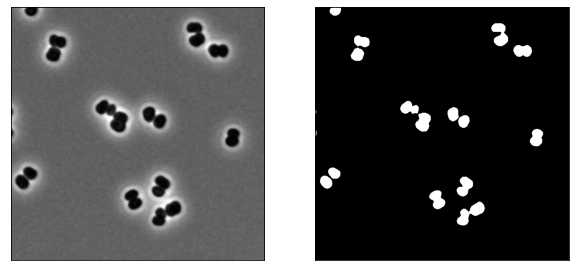

In [2]:
# Load
f = imread('originals/PIA17369_hires.jpg')

# Formatting
f = rgb2gray(f)
f = f[0:500, 0:500]
f = img_as_ubyte(f)
print("%s, [%d, %d]" % (f.dtype, f.min(), f.max()))

# Histogram
plt.hist(f.ravel(), bins=256)
plt.show()

# Threshold
g = (f<50) * 255

# Display
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))
ax1.imshow(f, cmap="gray")
ax1.set_xticks([])
ax1.set_yticks([])
ax2.imshow(g, cmap="gray")
ax2.set_xticks([])
ax2.set_yticks([])
plt.savefig("example-cells.png", bbox_inches="tight")
plt.show()

## K-means

Daisy

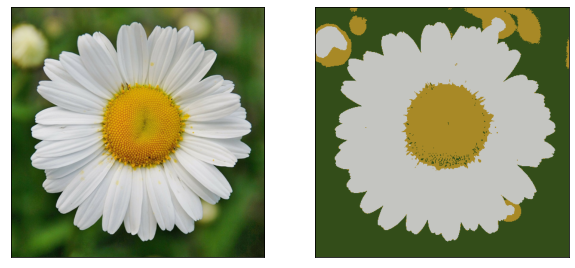

In [3]:
# Load
f = imread('originals/daisy.png')

# Segmentation
# Source: https://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html#sphx-glr-auto-examples-cluster-plot-color-quantization-py
n_colors = 3

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
f = np.array(f, dtype=np.float64) / 255

# Transform to a 2D numpy array
w, h, d = f.shape
image_array = np.reshape(f, (w * h, d))

# Fitting model
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array)

# Get labels
labels = kmeans.predict(image_array)

# Segmentation
codebook = kmeans.cluster_centers_
g = codebook[labels].reshape(w, h, -1)
g = np.array(g*255, dtype=np.uint8)

# Display
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))
ax1.imshow(f)
ax1.set_xticks([])
ax1.set_yticks([])
ax2.imshow(g)
ax2.set_xticks([])
ax2.set_yticks([])
plt.savefig("example-daisy.png", bbox_inches="tight")
plt.show()

## Region growing

Huang, Mei-Ling; Ling, Ting-Yu (2020), “Dataset of Breast mammography images with Masses”, Mendeley Data, V1, doi: 10.17632/x7bvzv6cvr.1
https://data.mendeley.com/datasets/x7bvzv6cvr/1

Region growing made with Gimp

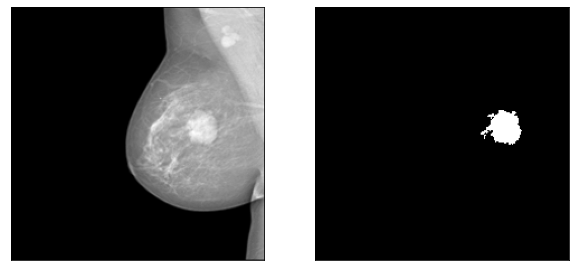

In [4]:
f = imread("example-mammo-img.png")
g = imread("example-mammo-seg.png")

# Display
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))
ax1.imshow(f, cmap="gray")
ax1.set_xticks([])
ax1.set_yticks([])
ax2.imshow(g, cmap="gray")
ax2.set_xticks([])
ax2.set_yticks([])
plt.savefig("example-mammo.png", bbox_inches="tight")
plt.show()

## SLIC

ICube/Sertit

Image de la thèse de Tran Thanh Ngo.

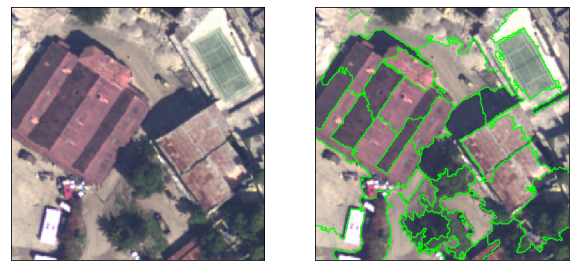

In [5]:
# Load
f = imread("originals/fiche16u_1.tif")

# Formatting
f = f[100:500,300:700]

# SLIC
g = slic(f, n_segments=40, compactness=10)
h = mark_boundaries(f, g, color=(0,1,0), mode="inner")

# Display
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))
ax1.imshow(f)
ax1.set_xticks([])
ax1.set_yticks([])
ax2.imshow(h)
ax2.set_xticks([])
ax2.set_yticks([])
plt.savefig("example-haiti.png", bbox_inches="tight")
plt.show()

## Watershed

[NASA](https://www.nasa.gov/mission_pages/station/multimedia/Exp10_image_007.html)

An Expedition 10 crewmember aboard the International Space Station captured this image of the full Moon.

In [6]:
# from skimage.morphology import watershed, disk
# from skimage.filters.rank import gradient

# # Chargement et mise en forme
# image = imread("/home/miv/mazet/moon.jpg")
# image = rgb2gray(image)
# image = img_as_ubyte(image)

# # Affichage
# imshow(image)
# imsave("moon.png", image)
# show()

# # local gradient
# gradient = gradient(image, disk(9))

# # process the watershed
# labels = watershed(gradient, markers=3)

# # Enregistrement
# imshow(labels)
# labels = img_as_ubyte(labels)
# print(labels.dtype)
# labels = 255 - (labels-1)*255
# print(labels.min())
# print(labels.max())
# imsave("moon-seg.png", labels)

## Snakes

In [7]:
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.pyplot import plot, savefig
# from skimage.color import rgb2gray
# from skimage import data
# from skimage.filters import gaussian
# from skimage.segmentation import active_contour


# img = data.astronaut()
# img = rgb2gray(img)
# img = img[0:300,100:400]

# s = np.linspace(0, 2*np.pi, 400)
# x = 120 + 100*np.cos(s)
# y = 100 + 100*np.sin(s)
# init = np.array([x, y]).T

# snake = active_contour(gaussian(img, 3), init, alpha=0.015, beta=10, gamma=0.001)

# imshow(img, cmap="gray")
# show()
# # imsave("astronaut.png", img)

# imshow(img, cmap="gray")
# plot(init[:, 0], init[:, 1], '--r')
# show()

# fig, ax = plt.subplots()
# imshow(img, cmap="gray")
# plot(snake[:, 0], snake[:, 1], color=[0,1,0], lw=3)
# ax.set_xticks([]), ax.set_yticks([])
# #savefig("astronaut-seg.png")
# # Image à enregistrer à la main
# show()
